## Data Collecting

### Data Acquisition

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
file_path = '/content/drive/MyDrive/Project RPL/Dataset.csv'

df = pd.read_csv(file_path)

## Exploraty Data analysis (EDA)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     980 non-null    int64  
 1   location  980 non-null    object 
 2   bedrooms  965 non-null    float64
 3   toilet    973 non-null    float64
 4   garage    837 non-null    float64
 5   LT        956 non-null    float64
 6   LB        963 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 53.7+ KB


In [35]:
df.describe()

,price,bedrooms,toilet,garage,LT,LB
count,9.800000e+02,965.000000,973.000000,837.000000,9.560000e+02,963.000000
mean,6.690574e+09,4.104663,3.456321,2.025090,5.951614e+07,251.631646
std,1.162490e+10,11.201772,10.698515,1.771813,6.933367e+08,573.446796
min,8.620000e+07,1.000000,1.000000,1.000000,3.750000e-01,0.375000
25%,1.480000e+09,3.000000,2.000000,1.000000,7.200000e+01,77.000000
50%,2.800000e+09,3.000000,3.000000,2.000000,1.200000e+02,145.000000
75%,6.300000e+09,4.000000,4.000000,2.000000,2.210000e+02,281.500000
max,1.600000e+11,248.000000,237.000000,20.000000,8.128169e+09,11620.000000


In [36]:
df.duplicated().sum()

np.int64(252)

### Handling Duplicates

In [37]:
df[df.duplicated(keep=False)].head(10)


,price,location,bedrooms,toilet,garage,LT,LB
4,490000000,"Sawangan, Depok",2.0,1.0,1.0,72.0,50.0
6,3500000000,"Bintaro, Tangerang Selatan",4.0,3.0,2.0,120.0,140.0
29,1100000000,"Cikarang Selatan, Bekasi",3.0,3.0,1.0,64.0,72.0
39,990000000,"Jati Uwung, Tangerang",3.0,2.0,NaN,72.0,69.0
40,990000000,"Jati Uwung, Tangerang",3.0,2.0,NaN,72.0,69.0
72,1230000000,"Cikupa Citra Raya, Tangerang",3.0,2.0,1.0,120.0,136.0
73,21000000000,"Ampera, Jakarta Selatan",4.0,3.0,9.0,1034.0,500.0
74,1600000000,"Ciangsana, Bogor",4.0,3.0,1.0,100.0,185.0
207,5800000000,"Pantai Indah Kapuk, Jakarta Utara",4.0,3.0,2.0,175.0,250.0
208,19500000000,"Kelapa Gading, Jakarta Utara",5.0,5.0,4.0,513.0,800.0


In [38]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,price,location,bedrooms,toilet,garage,LT,LB
876,328000000,"Batuaji, Tabanan",2.0,1.0,NaN,60.0,60.0
900,328000000,"Batuaji, Tabanan",2.0,1.0,NaN,60.0,60.0
231,365000000,"Jonggol, Bogor",3.0,2.0,1.0,72.0,72.0
444,365000000,"Jonggol, Bogor",3.0,2.0,1.0,72.0,72.0
4,490000000,"Sawangan, Depok",2.0,1.0,1.0,72.0,50.0
...,...,...,...,...,...,...,...
718,53000000000,"Kebayoran Baru, Jakarta Selatan",5.0,3.0,5.0,726.0,564.0
311,53000000000,"Menteng, Jakarta Pusat",4.0,4.0,6.0,548.0,600.0
508,53000000000,"Menteng, Jakarta Pusat",4.0,4.0,6.0,548.0,600.0
346,54900000000,"Menteng, Jakarta Pusat",8.0,8.0,6.0,629.0,505.0


In [39]:
df = df.drop_duplicates()


In [40]:
print(df.duplicated().sum())


0


In [41]:
print("Total data setelah bersih:", len(df))

Total data setelah bersih: 728


## Data Preprocessing

### Handling Missing Values

In [42]:
missing_value = df.isnull().sum()
missing_value

,0
price,0
location,0
bedrooms,11
toilet,7
garage,129
LT,19
LB,15


In [43]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['toilet'].fillna(df['toilet'].median(), inplace=True)
df['garage'].fillna(df['garage'].median(), inplace=True)
df['LT'].fillna(df['LT'].median(), inplace=True)
df['LB'].fillna(df['LB'].median(), inplace=True)


In [44]:
print(df.isnull().sum())


price       0
location    0
bedrooms    0
toilet      0
garage      0
LT          0
LB          0
dtype: int64


### Correlation Analysis.

Matriks Korelasi:
             price  bedrooms    toilet    garage        LT        LB
price     1.000000  0.066398  0.080258  0.522316 -0.036087  0.317753
bedrooms  0.066398  1.000000  0.994770  0.038852 -0.012412  0.048653
toilet    0.080258  0.994770  1.000000  0.041502 -0.005757  0.054390
garage    0.522316  0.038852  0.041502  1.000000  0.002718  0.271119
LT       -0.036087 -0.012412 -0.005757  0.002718  1.000000 -0.020842
LB        0.317753  0.048653  0.054390  0.271119 -0.020842  1.000000


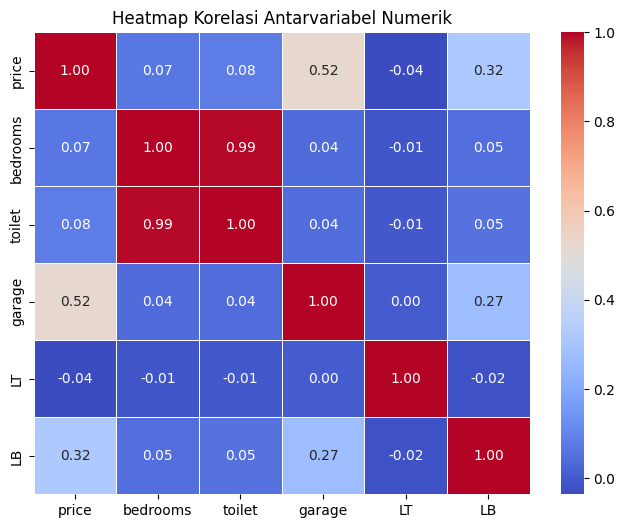

In [45]:
corr = df.corr(numeric_only=True)

print("Matriks Korelasi:")
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antarvariabel Numerik")
plt.show()

In [46]:
print("Korelasi setiap fitur terhadap harga (price):\n")
print(corr['price'].sort_values(ascending=False))


Korelasi setiap fitur terhadap harga (price):

price       1.000000
garage      0.522316
LB          0.317753
toilet      0.080258
bedrooms    0.066398
LT         -0.036087
Name: price, dtype: float64


### Outlier Detection

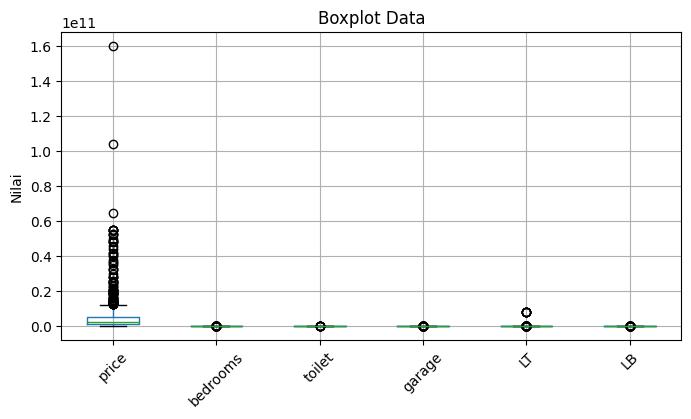

Data Outlier:
price       87
bedrooms    60
toilet       9
garage      69
LT          92
LB          61
dtype: int64


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
dataset = pd.DataFrame(df)
plt.figure(figsize=(8, 4))

cols_to_plot = ['price', 'bedrooms', 'toilet', 'garage', 'LT', 'LB']
dataset[cols_to_plot].boxplot()

# Menambahkan judul dan label sumbu y
plt.title('Boxplot Data')
plt.ylabel('Nilai')

# Mengatur label sumbu x
plt.xticks(ticks=range(1, len(cols_to_plot) + 1), labels=cols_to_plot, rotation=45)
plt.show()#


# Menghitung Q1, Q3, dan IQR untuk kolom numerik saja
Q1 = dataset[cols_to_plot].quantile(0.25)
Q3 = dataset[cols_to_plot].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outliers
outliers = ((dataset[cols_to_plot] < (Q1 - 1.5 * IQR)) | (dataset[cols_to_plot] > (Q3 + 1.5 * IQR))).sum()

# Menampilkan jumlah outliers per kolom
print('Data Outlier:')
print(outliers)


### Splitting Features and Target & Encoding Location

Matriks Korelasi:
                                            price  bedrooms    toilet  \
price                                    1.000000  0.066398  0.080258   
bedrooms                                 0.066398  1.000000  0.994770   
toilet                                   0.080258  0.994770  1.000000   
garage                                   0.522316  0.038852  0.041502   
LT                                      -0.036087 -0.012412 -0.005757   
...                                           ...       ...       ...   
loc_Villa Melati Mas, Tangerang Selatan -0.012874  0.000534  0.003256   
loc_Waru, Sidoarjo                      -0.013867 -0.003515 -0.005180   
loc_Wijaya, Jakarta Selatan             -0.000128 -0.003515 -0.000962   
loc_Wiyung, Surabaya                    -0.021007 -0.002109 -0.004346   
loc_kertajaya, Surabaya                  0.001218  0.000534  0.003256   

                                           garage        LT        LB  \
price                           

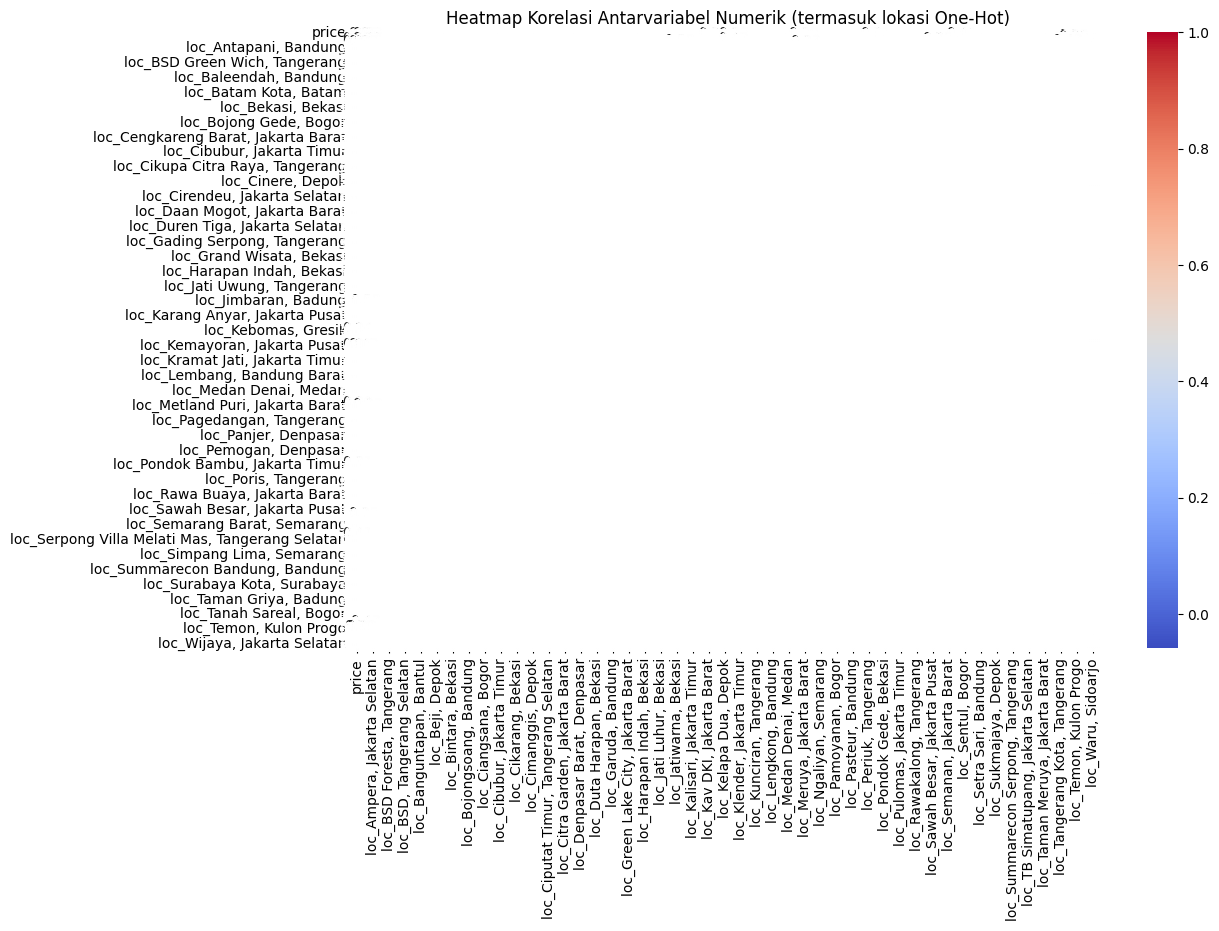

Korelasi setiap fitur terhadap harga (price):

price                               1.000000
garage                              0.522316
loc_Senopati, Jakarta Selatan       0.414165
LB                                  0.317753
loc_Pisangan Lama, Jakarta Timur    0.313475
                                      ...   
loc_Summarecon Bekasi, Bekasi      -0.035509
LT                                 -0.036087
loc_Jelambar, Jakarta Barat        -0.038418
loc_Sawangan, Depok                -0.038561
loc_Gading Serpong, Tangerang      -0.039017
Name: price, Length: 372, dtype: float64


In [48]:
# One-Hot Encoding untuk kolom lokasi
df_encoded = pd.get_dummies(df, columns=['location'], prefix='loc')

# Fitur numerik + lokasi hasil One-Hot
features = ['bedrooms', 'toilet', 'garage', 'LT', 'LB'] + [col for col in df_encoded if col.startswith('loc_')]
X = df_encoded[features]

# Target harga rumah
y = df_encoded['price']

# Split data training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Korelasi antar fitur (numerik termasuk One-Hot Encoded lokasi)
corr = df_encoded.corr(numeric_only=True)

print("Matriks Korelasi:")
print(corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antarvariabel Numerik (termasuk lokasi One-Hot)")
plt.show()

print("Korelasi setiap fitur terhadap harga (price):\n")
print(corr['price'].sort_values(ascending=False))


## Model Training using Bagging (Random Forest Regressor)

The process uses several models from the same algorithm, and trains each model on different samples from the same dataset. The predictions made by each model are then combined using simple statistics, such as voting or averaging.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)

# Training
rf_model.fit(X_train, y_train)

# Prediction
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluation
print("=== Bagging (Random Forest) ===")
print(f"Train R²: {r2_score(y_train, y_train_pred):.3f}")
print(f"Test  R²: {r2_score(y_test, y_test_pred):.3f}")
print(f"MAE: Rp {mean_absolute_error(y_test, y_test_pred):,.0f}")


=== Bagging (Random Forest) ===
Train R²: 0.793
Test  R²: 0.542
MAE: Rp 2,171,946,066


## Save Model After Training

In [54]:
import pickle

# Simpan model
with open('random_forest_model.sav', 'wb') as f:
    pickle.dump(rf_model, f)

# Simpan daftar fitur (termasuk hasil One-Hot)
with open('model_features.sav', 'wb') as f:
    pickle.dump(features, f)

print("Model dan daftar fitur berhasil disimpan.")


Model dan daftar fitur berhasil disimpan.


## Load a Saved Model

In [55]:
import pickle
from sklearn.metrics import mean_absolute_error, r2_score

# Load model dan fitur
with open('random_forest_model.sav', 'rb') as f:
    rf_loaded = pickle.load(f)

with open('model_features.sav', 'rb') as f:
    features = pickle.load(f)

print("Model dan fitur berhasil di-load.")

# Uji kembali model dengan data uji sebelumnya
y_pred_loaded = rf_loaded.predict(X_test)

# Evaluasi ulang
print("=== Pengujian Model yang Sudah di-Load ===")
print(f"Test R²: {r2_score(y_test, y_pred_loaded):.3f}")
print(f"MAE: Rp {mean_absolute_error(y_test, y_pred_loaded):,.0f}")


Model dan fitur berhasil di-load.
=== Pengujian Model yang Sudah di-Load ===
Test R²: 0.542
MAE: Rp 2,171,946,066
